In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns #for plotting
import matplotlib.pyplot as plt
from matplotlib import pylab
from scipy import stats

from scipy.stats import spearmanr,pointbiserialr  # for Spearman Correlation and Biserial
from statsmodels.stats.stattools import durbin_watson
from sklearn import preprocessing

import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import anderson, norm, uniform
from skgof import cvm_test, ks_test
import statsmodels.stats.diagnostic as sm_diagnostic

from warnings import filterwarnings
filterwarnings('ignore')

C:\Users\user\Miniconda3\lib\site-packages\skgof\ecdfgof.py:45: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  from .cvmdist import cvm_unif


In [2]:
#This is the first dataset with data about temperature, fog precence, wind speed and precipitation

In [3]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\data\3\temperature_data.csv",parse_dates=['Date'])
df = data.copy()


In [4]:
df.head(25)

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
0,2020-01-22,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.89,9.4,0.00,0
1,2020-01-23,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.56,14.9,0.00,1
2,2020-01-24,NaN,Afghanistan,0,0,0,0,33.0,65.0,4.50,10.4,0.17,1
3,2020-01-25,NaN,Afghanistan,0,0,0,0,33.0,65.0,7.78,6.1,0.57,1
4,2020-01-26,NaN,Afghanistan,0,0,0,0,33.0,65.0,6.00,10.8,0.00,1
5,2020-01-27,NaN,Afghanistan,0,0,0,0,33.0,65.0,6.11,3.7,0.04,0
6,2020-01-28,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.39,2.4,0.00,0
7,2020-01-29,NaN,Afghanistan,0,0,0,0,33.0,65.0,-9.33,2.4,0.00,0
8,2020-01-30,NaN,Afghanistan,0,0,0,0,33.0,65.0,-9.33,2.4,0.00,0
9,2020-01-31,NaN,Afghanistan,0,0,0,0,33.0,65.0,-14.67,1.9,0.00,1


In [5]:
print(df['Date'])

0       2020-01-22
1       2020-01-23
2       2020-01-24
3       2020-01-25
4       2020-01-26
           ...    
20283   2020-03-26
20284   2020-03-27
20285   2020-03-28
20286   2020-03-29
20287   2020-03-30
Name: Date, Length: 20288, dtype: datetime64[ns]


In [6]:
#import datetime

In [7]:
#df['Date'] = pd.to_datetime(df['Date'])
#df['Date'] = df['Date'].dt.strftime('%m-%d-%Y')

In [8]:
#Remove the dates where the cases are zero

In [9]:
pf=df[df.Cumulative_cases != 0]

In [10]:
pf.head()

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
33,2020-02-24,NaN,Afghanistan,1,0,1,0,33.0,65.0,4.44,4.0,0.47,1
34,2020-02-25,NaN,Afghanistan,1,0,0,0,33.0,65.0,4.56,5.8,0.00,1
35,2020-02-26,NaN,Afghanistan,1,0,0,0,33.0,65.0,8.17,6.2,0.00,1
36,2020-02-27,NaN,Afghanistan,1,0,0,0,33.0,65.0,4.06,5.8,1.57,1
37,2020-02-28,NaN,Afghanistan,1,0,0,0,33.0,65.0,2.50,2.8,0.47,1


In [11]:
#Work on the 15 first dates 

In [12]:
pf.set_index('Date',inplace=True) #set date as the index

In [13]:
pf1= pf['01-22-2020':'02-05-2020']

In [14]:
pf1.head(15)

,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
Date,,,,,,,,,,,,
2020-02-03,NaN,Afghanistan,1,0,0,0,33.0000,65.0000,2.39,5.8,0.00,1
2020-02-03,NaN,Algeria,3,0,2,0,28.0339,1.6596,22.83,2.8,0.00,0
2020-02-03,NaN,Andorra,1,0,1,0,42.5063,1.5218,-0.33,1.7,0.06,0
2020-02-03,NaN,Armenia,1,0,0,0,40.0691,45.0382,-0.28,0.0,0.08,1
2020-01-26,New South Wales,Australia,3,0,3,0,-33.8688,151.2093,27.00,0.0,0.00,0
2020-01-27,New South Wales,Australia,4,0,1,0,-33.8688,151.2093,25.61,0.0,0.00,0
2020-01-28,New South Wales,Australia,4,0,0,0,-33.8688,151.2093,25.44,0.0,0.00,0
2020-01-29,New South Wales,Australia,4,0,0,0,-33.8688,151.2093,24.06,0.0,0.00,0
2020-01-30,New South Wales,Australia,4,0,0,0,-33.8688,151.2093,25.94,0.0,0.00,0


In [15]:
pf2 = pf1.drop(['State','Daily_cases','Daily_death','Latitude','Longitude'], axis=1)

In [16]:
pf2.head()

,Country,Cumulative_cases,Cumulative_death,Temperature,Wind_speed,Precipitation,Fog_Presence
Date,,,,,,,
2020-02-03,Afghanistan,1,0,2.39,5.8,0.00,1
2020-02-03,Algeria,3,0,22.83,2.8,0.00,0
2020-02-03,Andorra,1,0,-0.33,1.7,0.06,0
2020-02-03,Armenia,1,0,-0.28,0.0,0.08,1
2020-01-26,Australia,3,0,27.00,0.0,0.00,0


In [17]:
#Mean for each group of countries
country_list = pf2['Country'].unique()
cumulated_cases = []
deaths = []
temperature = []
wind = []
precipitation = []
fog = []

for country in country_list:
    country_wise = pf2['Country'] == country  
    test_data = pf2[country_wise]
    
    cumulated_cases.append(test_data['Cumulative_cases'].mean())
    deaths.append(test_data['Cumulative_death'].mean())
    temperature.append(test_data['Temperature'].mean())
    wind.append(test_data['Wind_speed'].mean())
    precipitation.append(test_data['Precipitation'].mean())
    fog.append(test_data['Fog_Presence'].mean())
    
#Converting the lists to a pandas dataframe.

country_dataset = {'Country' : country_list, 'Cumulative_cases' : cumulated_cases, 'Cumulative_death' : deaths, 'Temperature':temperature,'Wind_speed':wind,'Precipitation':precipitation,'Fog_Presence':fog}
country_dataset = pd.DataFrame(country_dataset) 

In [18]:
country_dataset.head()

,Country,Cumulative_cases,Cumulative_death,Temperature,Wind_speed,Precipitation,Fog_Presence
0,Afghanistan,1.00,0.00,2.39,5.800,0.0000,1.00
1,Algeria,3.00,0.00,22.83,2.800,0.0000,0.00
2,Andorra,1.00,0.00,-0.33,1.700,0.0600,0.00
3,Armenia,1.00,0.00,-0.28,0.000,0.0800,1.00
4,Australia,3.28,0.04,23.26,4.308,0.0348,0.24


In [19]:
country_dataset.corr()

,Cumulative_cases,Cumulative_death,Temperature,Wind_speed,Precipitation,Fog_Presence
Cumulative_cases,1.000000,0.924657,-0.090330,0.239559,0.198495,-0.008794
Cumulative_death,0.924657,1.000000,-0.049295,0.245077,0.030281,-0.062580
Temperature,-0.090330,-0.049295,1.000000,-0.142965,-0.120473,-0.367650
Wind_speed,0.239559,0.245077,-0.142965,1.000000,0.069537,0.127435
Precipitation,0.198495,0.030281,-0.120473,0.069537,1.000000,0.369077
Fog_Presence,-0.008794,-0.062580,-0.367650,0.127435,0.369077,1.000000


In [22]:
pfc = country_dataset.drop('Country', axis=1)

In [23]:
#Remove outliers with z-score
z_scores = stats.zscore(pfc)
#calculate z-scores of `pf5`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = pfc[filtered_entries]

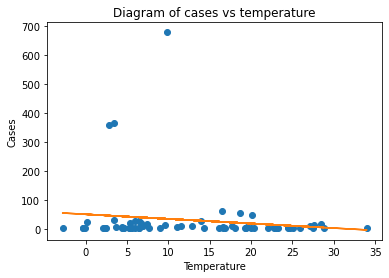

In [24]:
xi = new_df.Temperature
y = new_df.Cumulative_cases

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("Temperature")
plt.ylabel("Cases")
plt.title('Diagram of cases vs temperature')
ax = plt.gca()
fig = plt.gcf()

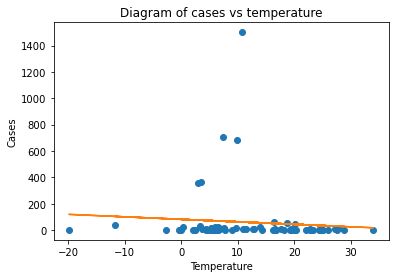

In [26]:
#With the outliers
xi = country_dataset.Temperature
y = country_dataset.Cumulative_cases

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("Temperature")
plt.ylabel("Cases")
plt.title('Diagram of cases vs temperature')
ax = plt.gca()
fig = plt.gcf()

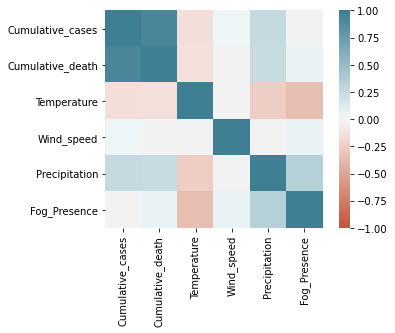

In [27]:
corr = new_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True)

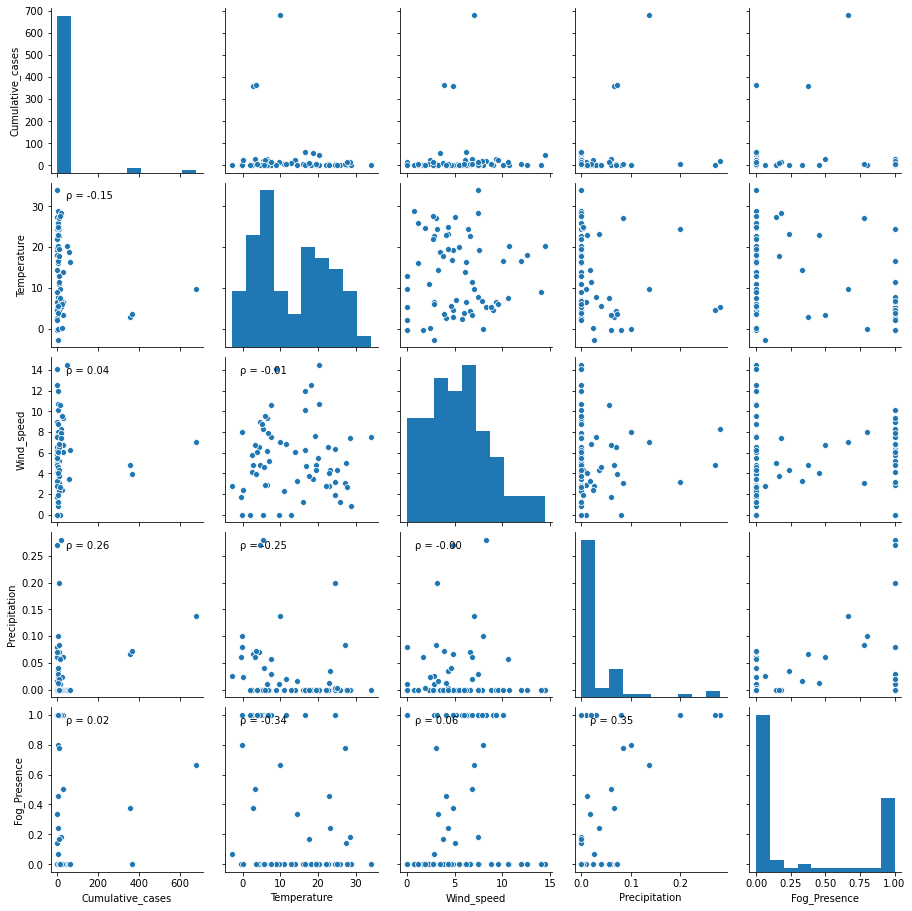

In [28]:
from scipy.stats import pearsonr

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
g = sns.pairplot(new_df, vars=["Cumulative_cases","Temperature","Wind_speed","Precipitation","Fog_Presence"])
g.map_lower(corrfunc)
plt.show()

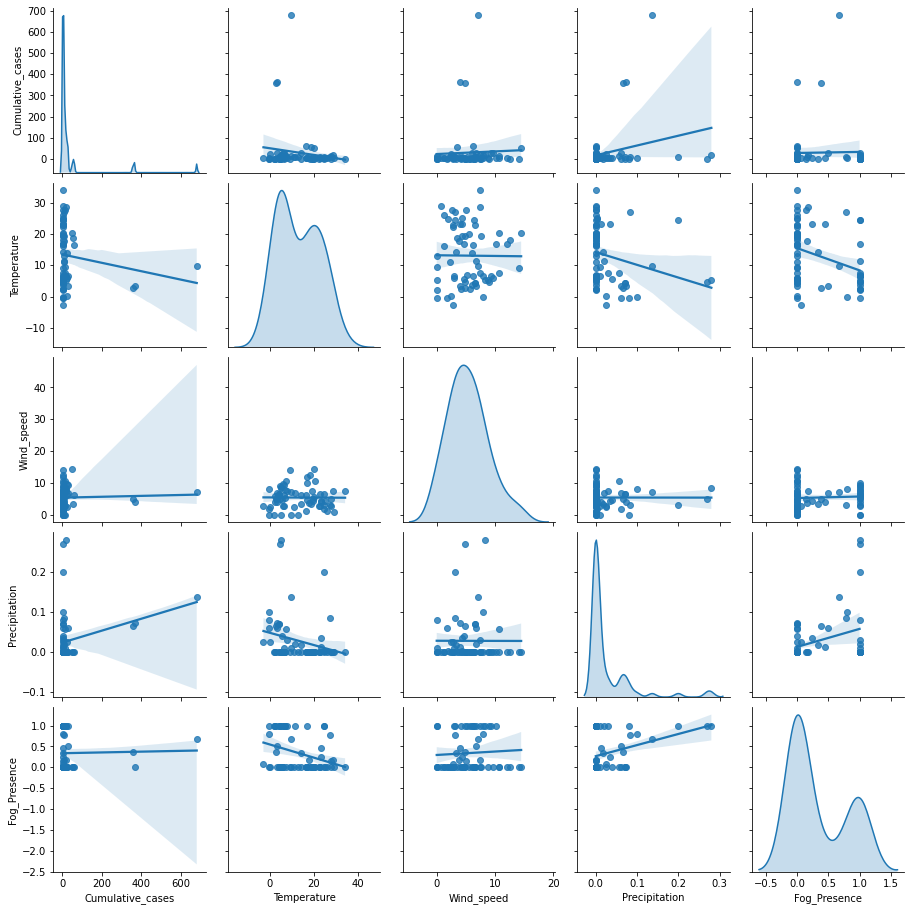

In [29]:
sns.pairplot(new_df, diag_kind="kde", kind="reg", vars=["Cumulative_cases","Temperature","Wind_speed","Precipitation","Fog_Presence"])

In [14]:
pf1.resample('SM').mean()

,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
Date,,,,,,,,,,
2020-01-15,73.839793,1.746770,19.832041,0.431525,28.922881,105.141737,6.266305,4.651680,0.063282,0.341085
2020-01-31,510.519651,15.956332,36.484716,1.000000,29.537801,77.625871,9.009563,5.174236,0.033712,0.349345


In [30]:
#Work on later cases (15 days again)

In [31]:
pf3= pf['03-15-2020':'03-30-2020']

In [32]:
pf3.head()

,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
Date,,,,,,,,,,,,
2020-03-15,NaN,Afghanistan,16,0,5,0,33.0,65.0,4.50,9.0,0.00,0
2020-03-16,NaN,Afghanistan,21,0,5,0,33.0,65.0,4.50,9.0,0.00,0
2020-03-17,NaN,Afghanistan,22,0,1,0,33.0,65.0,6.56,4.8,0.04,1
2020-03-18,NaN,Afghanistan,22,0,0,0,33.0,65.0,6.56,4.8,0.04,1
2020-03-19,NaN,Afghanistan,22,0,0,0,33.0,65.0,7.33,5.3,0.31,1


In [33]:
pf4 = pf3.drop(['State','Daily_cases','Daily_death','Latitude','Longitude'], axis=1)

In [34]:
pf4.head(50)

,Country,Cumulative_cases,Cumulative_death,Temperature,Wind_speed,Precipitation,Fog_Presence
Date,,,,,,,
2020-03-15,Afghanistan,16,0,4.50,9.0,0.00,0
2020-03-16,Afghanistan,21,0,4.50,9.0,0.00,0
2020-03-17,Afghanistan,22,0,6.56,4.8,0.04,1
2020-03-18,Afghanistan,22,0,6.56,4.8,0.04,1
2020-03-19,Afghanistan,22,0,7.33,5.3,0.31,1
2020-03-20,Afghanistan,24,0,4.11,4.8,1.22,1
2020-03-21,Afghanistan,24,0,5.78,2.7,2.20,1
2020-03-22,Afghanistan,40,1,7.06,7.5,0.00,1
2020-03-23,Afghanistan,40,1,7.22,7.3,0.47,1


In [35]:
#Mean for each group of countries
country_list = pf4['Country'].unique()
cumulated_cases = []
deaths = []
temperature = []
wind = []
precipitation = []
fog = []

for country in country_list:
    country_wise = pf4['Country'] == country  
    test_data = pf4[country_wise]
    
    cumulated_cases.append(test_data['Cumulative_cases'].mean())
    deaths.append(test_data['Cumulative_death'].mean())
    temperature.append(test_data['Temperature'].mean())
    wind.append(test_data['Wind_speed'].mean())
    precipitation.append(test_data['Precipitation'].mean())
    fog.append(test_data['Fog_Presence'].mean())
    
#Converting the lists to a pandas dataframe.

country_dataset = {'Country' : country_list, 'Cumulative_cases' : cumulated_cases, 'Cumulative_death' : deaths, 'Temperature':temperature,'Wind_speed':wind,'Precipitation':precipitation,'Fog_Presence':fog}
country_dataset = pd.DataFrame(country_dataset)    

In [36]:
country_dataset.head()

,Country,Cumulative_cases,Cumulative_death,Temperature,Wind_speed,Precipitation,Fog_Presence
0,Afghanistan,62.062500,1.562500,5.146875,5.612500,0.779375,0.875000
1,Albania,116.937500,4.500000,12.493750,3.006250,0.050000,0.437500
2,Algeria,242.125000,17.125000,22.978750,8.318750,0.000000,0.000000
3,Andorra,149.875000,1.687500,2.073125,2.400000,0.015000,0.000000
4,Angola,3.727273,0.363636,28.393636,6.509091,0.000000,0.181818


In [37]:
country_dataset.corr()

,Cumulative_cases,Cumulative_death,Temperature,Wind_speed,Precipitation,Fog_Presence
Cumulative_cases,1.000000,0.918290,-0.171058,0.004409,-0.009468,-0.031184
Cumulative_death,0.918290,1.000000,-0.099194,-0.004766,-0.000492,-0.019194
Temperature,-0.171058,-0.099194,1.000000,-0.096561,0.071941,-0.068356
Wind_speed,0.004409,-0.004766,-0.096561,1.000000,-0.067170,-0.056166
Precipitation,-0.009468,-0.000492,0.071941,-0.067170,1.000000,0.348320
Fog_Presence,-0.031184,-0.019194,-0.068356,-0.056166,0.348320,1.000000


In [38]:
pf5 = country_dataset.drop('Country', axis=1)

In [40]:
#Standardization

In [32]:
from sklearn import preprocessing
# Get column names first
names = pf5.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(pf5)
scaled_df = pd.DataFrame(scaled_df, columns=names)

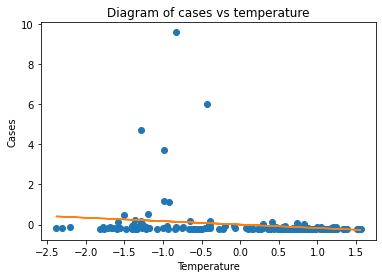

In [34]:
xi = scaled_df.Temperature
y = scaled_df.Cumulative_cases

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("Temperature")
plt.ylabel("Cases")
plt.title('Diagram of cases vs temperature')
ax = plt.gca()
fig = plt.gcf()

In [39]:
#Remove outliers with z-score

In [40]:
z_scores = stats.zscore(pf5)
#calculate z-scores of `pf5`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = pf5[filtered_entries]

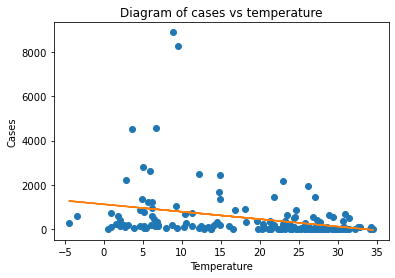

In [41]:
xi = new_df.Temperature
y = new_df.Cumulative_cases

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("Temperature")
plt.ylabel("Cases")
plt.title('Diagram of cases vs temperature')
ax = plt.gca()
fig = plt.gcf()

In [42]:
#With the outliers

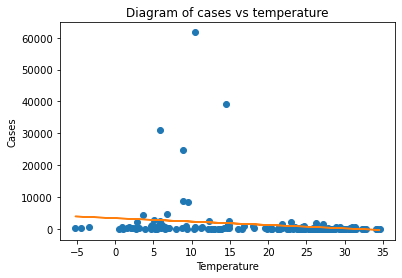

In [43]:

xi = country_dataset.Temperature
y = country_dataset.Cumulative_cases

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("Temperature")
plt.ylabel("Cases")
plt.title('Diagram of cases vs temperature')
ax = plt.gca()
fig = plt.gcf()

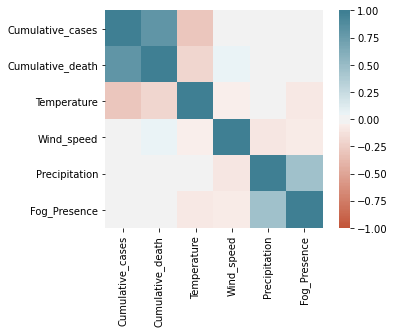

In [44]:
corr = new_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True)

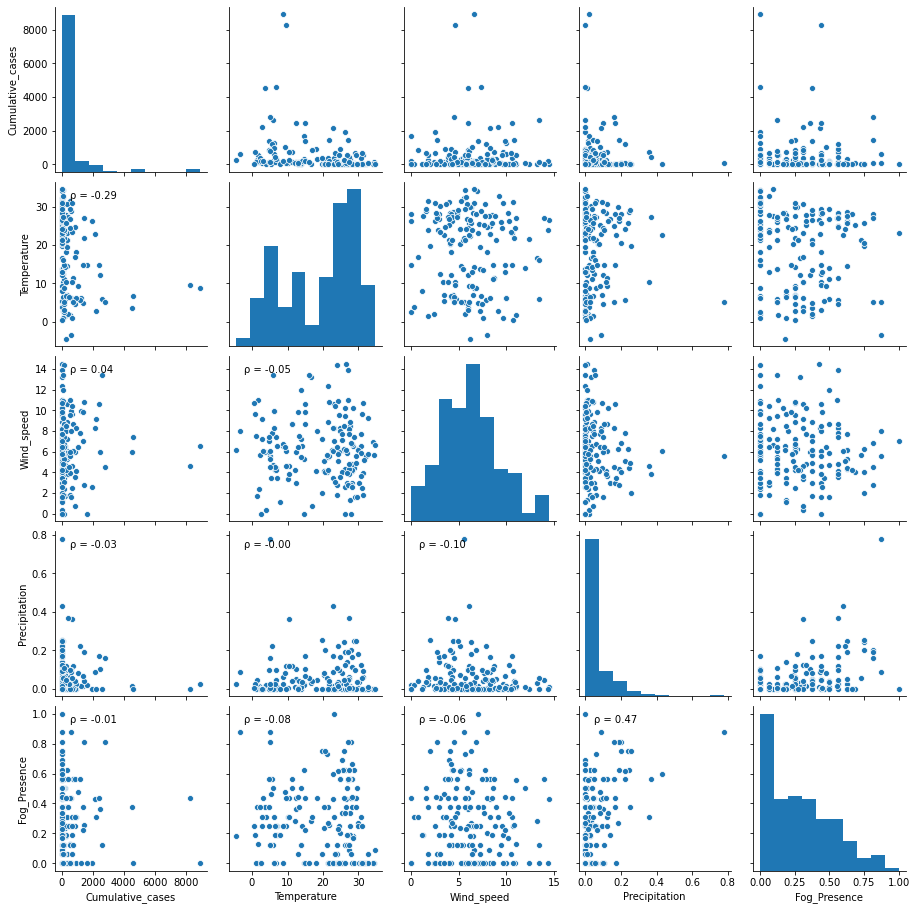

In [45]:
from scipy.stats import pearsonr

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
g = sns.pairplot(new_df, vars=["Cumulative_cases","Temperature","Wind_speed","Precipitation","Fog_Presence"])
g.map_lower(corrfunc)
plt.show()

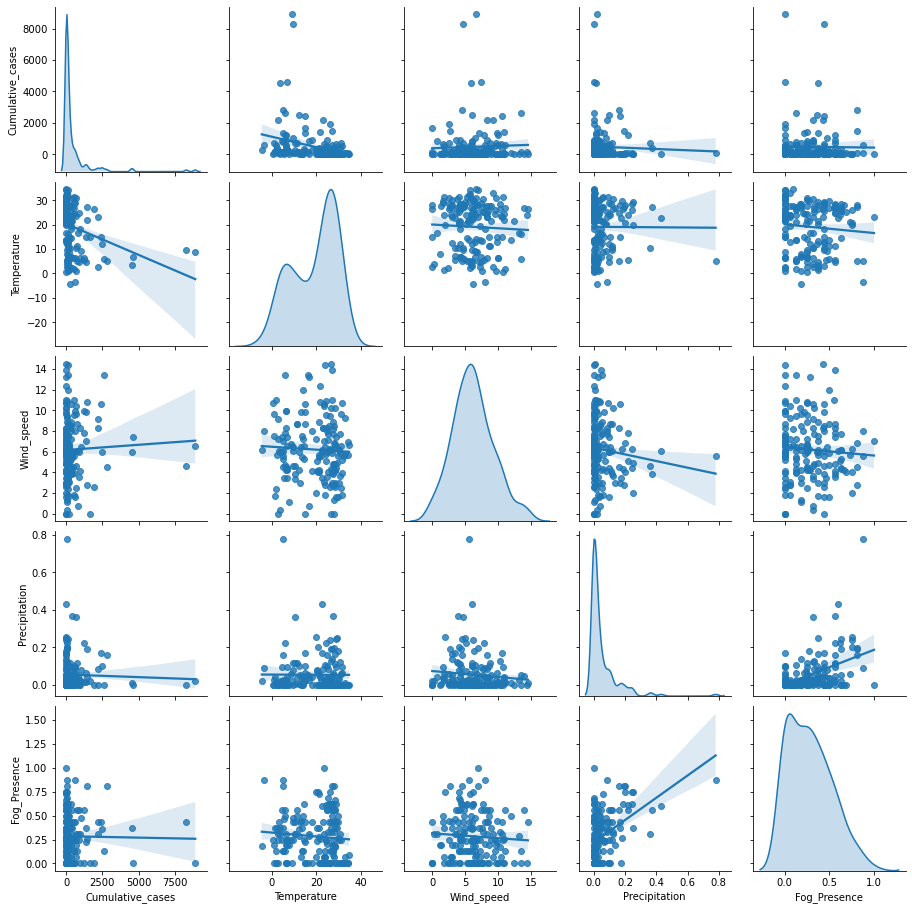

In [46]:
sns.pairplot(new_df, diag_kind="kde", kind="reg", vars=["Cumulative_cases","Temperature","Wind_speed","Precipitation","Fog_Presence"])

In [22]:
df_compress = df.dropna(0).select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_compress['Cumulative_cases'] = df['Cumulative_cases']

In [23]:
# Now we select the columns that interest us
cols_of_interest = ['Cumulative_cases','Cumulative_death','Temperature','Wind_speed','Precipitation','Fog_Presence']
df_compress = df_compress[cols_of_interest]

In [47]:
#plot without any of the changes (standardization)

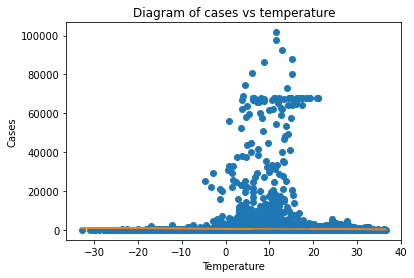

In [27]:
xi = df.Temperature
y = df.Cumulative_cases
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("Temperature")
plt.ylabel("Cases")
plt.title('Diagram of cases vs temperature')
ax = plt.gca()
fig = plt.gcf()

In [48]:
#Covariance

In [49]:
new_df.Temperature.cov(new_df.Cumulative_cases)

-3375.638071931306

In [50]:
new_df.Temperature.cov(new_df.Cumulative_death)

-45.76435812100618

In [51]:
#Correlation

In [52]:
new_df.Temperature.corr(new_df.Cumulative_cases)

-0.2920818613305683

In [53]:
new_df.Temperature.corr(new_df.Cumulative_death)

-0.19292762762887616

In [54]:
#Spearman correlation

In [55]:
spearmanr(new_df.Cumulative_cases,new_df.Temperature)

SpearmanrResult(correlation=-0.4919718791144584, pvalue=1.6797359305386342e-11)

In [56]:
spearmanr(new_df.Cumulative_death,new_df.Temperature)

SpearmanrResult(correlation=-0.3646249879062672, pvalue=1.367458796522774e-06)

In [57]:
#Pearson correlation

In [58]:
from scipy.stats import pearsonr

In [59]:
pearsonr(new_df.Cumulative_cases,new_df.Temperature)

(-0.2920818613305683, 0.00013433060668611673)

In [60]:
pearsonr(new_df.Cumulative_death,new_df.Temperature)

(-0.1929276276288761, 0.012761453854191994)

In [61]:
#Pearson correlation
np.corrcoef(new_df.Temperature,new_df.Cumulative_cases)

array([[ 1.        , -0.29208186],
       [-0.29208186,  1.        ]])

In [62]:
#Kelndall correlation
import scipy.stats

In [63]:
scipy.stats.kendalltau(new_df.Temperature,new_df.Cumulative_cases)

KendalltauResult(correlation=-0.33392981247038434, pvalue=1.718332138490421e-10)

In [64]:
#These functions return objects that contain two values:

#The correlation coefficient
#The p-value
#You use the p-value in statistical methods when you’re testing a hypothesis. 
#The p-value is an important measure that requires in-depth knowledge
#of probability and statistics to interpret.

In [65]:
#Linear regression
#.slope: the slope of the regression line
#.intercept: the intercept of the regression line
#.pvalue: the p-value
#.stderr: the standard error of the estimated gradient

In [66]:
result = scipy.stats.linregress(new_df.Temperature,new_df.Cumulative_cases)

In [67]:
result.slope

-33.591173332662166

In [68]:
result.intercept

1117.2563076982697

In [69]:
result.rvalue

-0.29208186133056824

In [70]:
 result.pvalue

0.00013433060668611662

In [71]:
result.stderr

8.588853545121424

In [72]:
slope, intercept, r, p, stderr = scipy.stats.linregress(new_df.Temperature,new_df.Cumulative_cases)

In [73]:
line = f'Regression line: Cumulative_cases={intercept:.2f}+{slope:.2f}Temperature, r={r:.2f}'
line 

'Regression line: Cumulative_cases=1117.26+-33.59Temperature, r=-0.29'

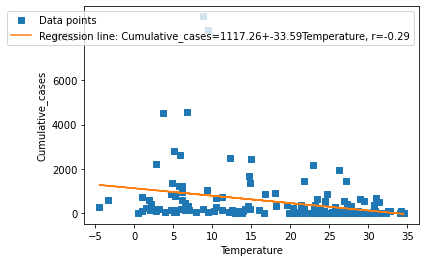

In [74]:
fig, ax = plt.subplots()
ax.plot(new_df.Temperature,new_df.Cumulative_cases , linewidth=0, marker='s', label='Data points')
ax.plot(new_df.Temperature, intercept + slope * new_df.Temperature, label=line)
ax.set_xlabel('Temperature')
ax.set_ylabel('Cumulative_cases')
ax.legend(facecolor='white')
plt.show()

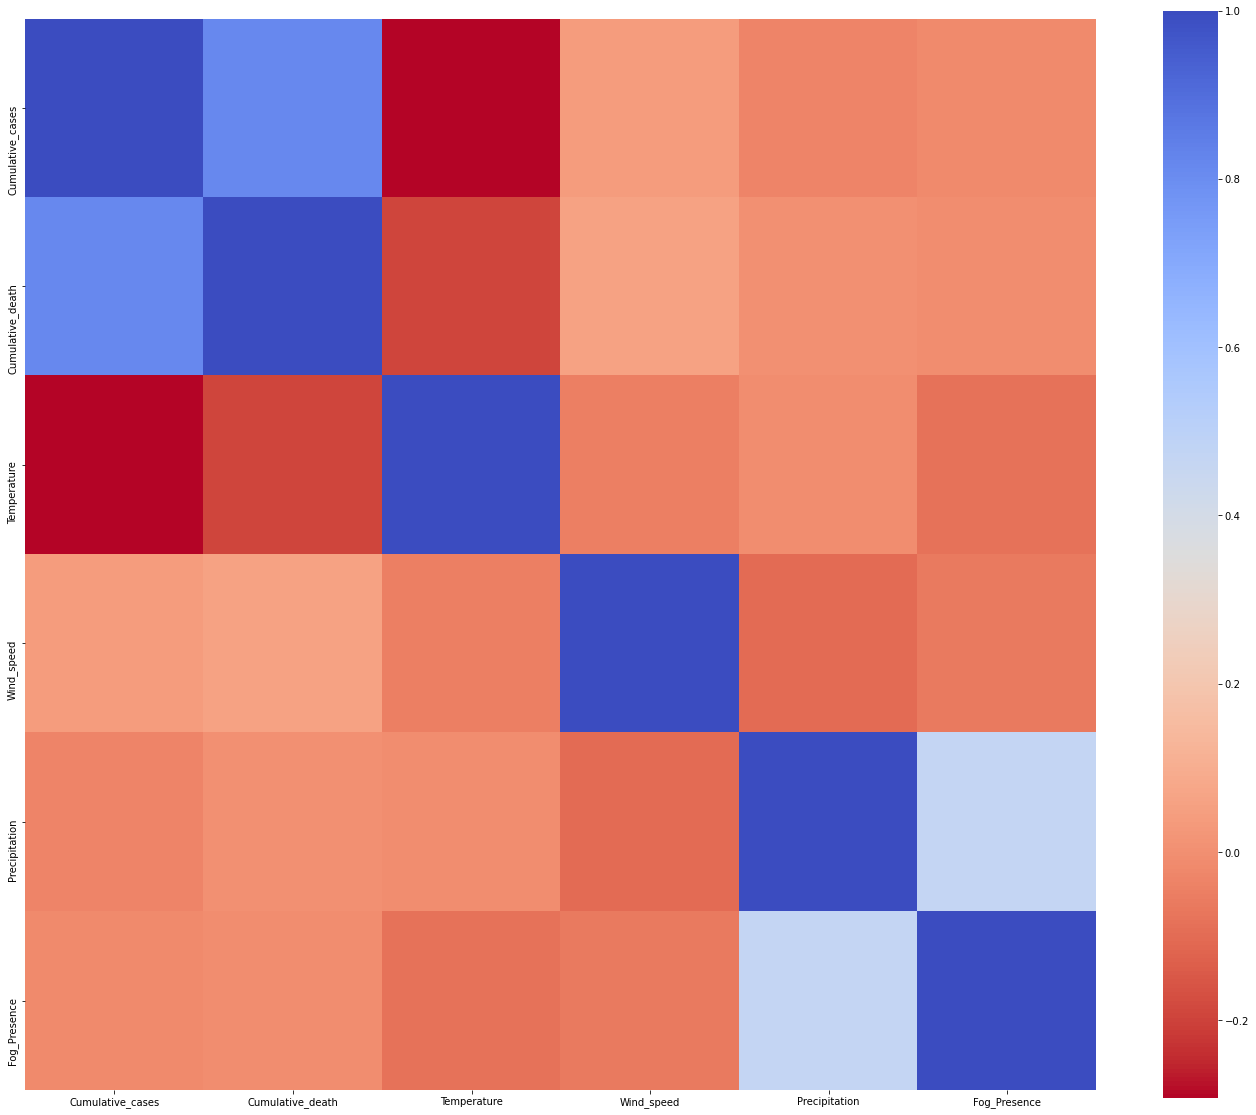

In [75]:

# calculate the correlation matrix
corr = new_df.corr()
f, ax2 = plt.subplots(1, figsize=(24,20))

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2,
        square=True)

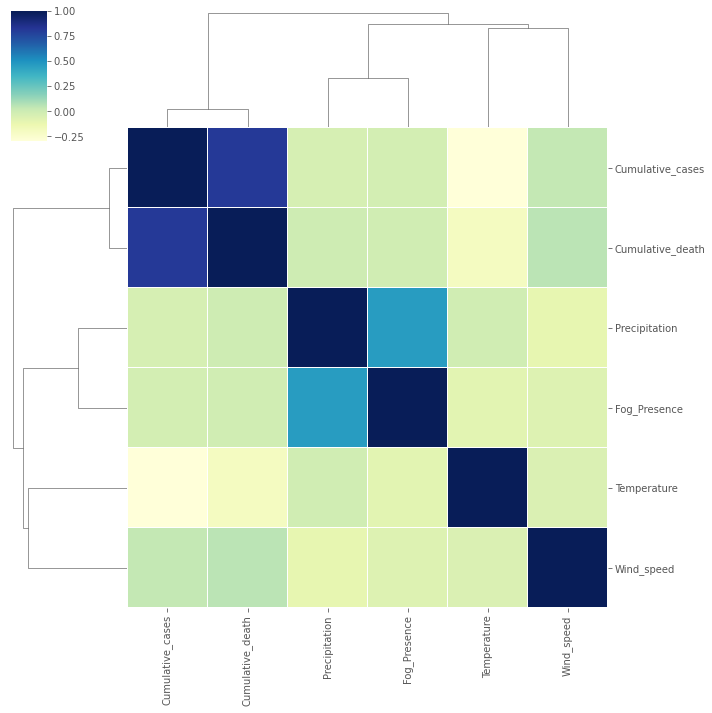

In [77]:
corrmat = new_df.corr() 
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg 

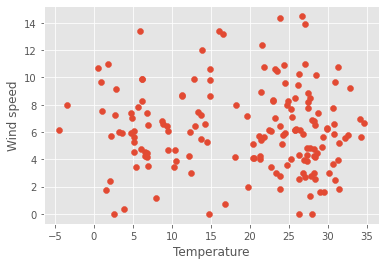

In [76]:
matplotlib.style.use('ggplot')

plt.scatter(new_df.Temperature, new_df.Wind_speed)
plt.xlabel("Temperature")
plt.ylabel("Wind speed")
plt.show()

In [78]:
#This is the second dataset with information such as temperature,minimum and maximum temperature as well as the mean
#mean station pressure,mean see level pressure,absolute humidity,relative humidity,
#mean dew point,mean wind speed,precipitation and fog

In [168]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\data\3\weather_week1.csv")
df = data.copy()

In [169]:
df.head(70)

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,1,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0.0,0.0,22,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0
1,2,NaN,Afghanistan,33.0000,65.0000,2020-01-23,0.0,0.0,23,42.0,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1
2,3,NaN,Afghanistan,33.0000,65.0000,2020-01-24,0.0,0.0,24,40.1,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1
3,4,NaN,Afghanistan,33.0000,65.0000,2020-01-25,0.0,0.0,25,46.0,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1
4,5,NaN,Afghanistan,33.0000,65.0000,2020-01-26,0.0,0.0,26,42.8,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,96,NaN,Albania,41.1533,20.1683,2020-01-24,0.0,0.0,24,46.7,32.0,63.0,15.4,1025.7,34.8,0.629623,0.181447,0.8,0.00,0
66,97,NaN,Albania,41.1533,20.1683,2020-01-25,0.0,0.0,25,51.5,42.4,59.0,13.8,1023.9,45.3,0.791856,0.205985,0.7,0.00,1
67,98,NaN,Albania,41.1533,20.1683,2020-01-26,0.0,0.0,26,52.5,49.6,55.8,8.8,1018.8,51.8,0.974393,0.250212,0.5,0.06,1
68,99,NaN,Albania,41.1533,20.1683,2020-01-27,0.0,0.0,27,50.9,49.3,55.0,4.4,1014.5,50.7,0.992575,0.260514,2.5,1.38,1


In [170]:
print(df['Date'])

0        2020-01-22
1        2020-01-23
2        2020-01-24
3        2020-01-25
4        2020-01-26
            ...    
17887    2020-03-20
17888    2020-03-21
17889    2020-03-22
17890    2020-03-23
17891    2020-03-24
Name: Date, Length: 17892, dtype: object


In [171]:
df['Date']=pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='ignore')
print(df['Date'])

0       2020-01-22
1       2020-01-23
2       2020-01-24
3       2020-01-25
4       2020-01-26
           ...    
17887   2020-03-20
17888   2020-03-21
17889   2020-03-22
17890   2020-03-23
17891   2020-03-24
Name: Date, Length: 17892, dtype: datetime64[ns]


In [172]:
#Remove the dates where the cases are zero
pf=df[df.ConfirmedCases != 0]

In [173]:
pf.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
33,34,NaN,Afghanistan,33.0,65.0,2020-02-24,1.0,0.0,55,40.0,32.4,48.0,778.4,1015.9,32.7,0.748905,0.306514,4.0,0.47,1
34,35,NaN,Afghanistan,33.0,65.0,2020-02-25,1.0,0.0,56,40.2,32.9,47.5,778.1,1015.4,28.2,0.618933,0.249074,5.8,0.00,1
35,36,NaN,Afghanistan,33.0,65.0,2020-02-26,1.0,0.0,57,46.7,35.2,55.9,775.4,1008.4,28.2,0.482121,0.138939,6.2,0.00,1
36,37,NaN,Afghanistan,33.0,65.0,2020-02-27,1.0,0.0,58,39.3,33.4,48.0,772.6,1008.7,33.4,0.791610,0.345486,5.8,1.57,1
37,38,NaN,Afghanistan,33.0,65.0,2020-02-28,1.0,0.0,59,36.5,29.5,44.8,773.4,1011.4,29.9,0.767225,0.486527,2.8,0.47,1


In [174]:
pf.set_index('Date',inplace=True) #set date as the index

In [175]:
pf3= pf['03-15-2020':'03-30-2020']

In [176]:
pf3.head()

,Id,Province/State,Country/Region,Lat,Long,ConfirmedCases,Fatalities,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
Date,,,,,,,,,,,,,,,,,,,
2020-03-15,54,NaN,Afghanistan,33.0,65.0,16.0,0.0,75,40.1,29.3,52.7,777.7,1015.0,15.7,0.366767,0.148837,9.0,0.00,0
2020-03-16,55,NaN,Afghanistan,33.0,65.0,21.0,0.0,76,40.1,29.3,52.7,777.7,1015.0,15.7,0.366767,0.148837,9.0,0.00,0
2020-03-17,56,NaN,Afghanistan,33.0,65.0,22.0,0.0,77,43.8,35.8,56.3,778.5,1013.9,32.6,0.643933,0.206972,4.8,0.04,1
2020-03-18,57,NaN,Afghanistan,33.0,65.0,22.0,0.0,78,43.8,35.8,56.3,778.5,1013.9,32.6,0.643933,0.206972,4.8,0.04,1
2020-03-19,58,NaN,Afghanistan,33.0,65.0,22.0,0.0,79,45.2,32.0,59.7,775.3,1009.5,32.5,0.607897,0.184277,5.3,0.31,1


In [177]:
df2 = pf3.drop(['Province/State','day_from_jan_first','Lat','Long'], axis=1)

In [178]:
df2.head()

,Id,Country/Region,ConfirmedCases,Fatalities,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
Date,,,,,,,,,,,,,,,
2020-03-15,54,Afghanistan,16.0,0.0,40.1,29.3,52.7,777.7,1015.0,15.7,0.366767,0.148837,9.0,0.00,0
2020-03-16,55,Afghanistan,21.0,0.0,40.1,29.3,52.7,777.7,1015.0,15.7,0.366767,0.148837,9.0,0.00,0
2020-03-17,56,Afghanistan,22.0,0.0,43.8,35.8,56.3,778.5,1013.9,32.6,0.643933,0.206972,4.8,0.04,1
2020-03-18,57,Afghanistan,22.0,0.0,43.8,35.8,56.3,778.5,1013.9,32.6,0.643933,0.206972,4.8,0.04,1
2020-03-19,58,Afghanistan,22.0,0.0,45.2,32.0,59.7,775.3,1009.5,32.5,0.607897,0.184277,5.3,0.31,1


In [179]:
#Mean for each group of countries
country_list = df2['Country/Region'].unique()
cumulated_cases = []
deaths = []
temperature = []
wind = []
precipitation = []
fog = []
min1 = []
max1 = []
stp = []
slp =[]
dewp = []
rh = []
ah = []

for country in country_list:
    country_wise = df2['Country/Region'] == country  
    test_data = df2[country_wise]
    
    cumulated_cases.append(test_data['ConfirmedCases'].mean())
    deaths.append(test_data['Fatalities'].mean())
    temperature.append(test_data['temp'].mean())
    wind.append(test_data['wdsp'].mean())
    precipitation.append(test_data['prcp'].mean())
    fog.append(test_data['fog'].mean())
    min1.append(test_data['min'].mean())
    max1.append(test_data['max'].mean())
    stp.append(test_data['stp'].mean())
    slp.append(test_data['slp'].mean())
    dewp.append(test_data['dewp'].mean())
    rh.append(test_data['rh'].mean())
    ah.append(test_data['ah'].mean())
     

#Converting the lists to a pandas dataframe.

country_dataset = {'Country/Region' : country_list, 'ConfirmedCases' : cumulated_cases, 'Fatalities' : deaths, 'temp':temperature,'wdsp':wind,'prcp':precipitation,'fog':fog, 'min':min1, 'max':max1, 'stp':stp, 'slp':slp,'dewp':dewp,'rh':rh, 'ah':ah}
country_dataset = pd.DataFrame(country_dataset)

In [180]:
country_dataset.head()

,Country/Region,ConfirmedCases,Fatalities,temp,wdsp,prcp,fog,min,max,stp,slp,dewp,rh,ah
0,Afghanistan,30.5,0.3,41.76,5.98,0.971,0.8,32.74,52.29,775.33,1010.99,29.11,0.624229,0.376098
1,Albania,73.3,2.2,54.56,2.50,0.055,0.3,45.19,65.22,6.77,1016.78,38.15,0.552157,0.143159
2,Algeria,124.7,10.7,74.10,8.44,0.000,0.0,57.79,88.22,999.90,1007.71,22.12,0.144819,0.038825
3,Andorra,70.7,0.3,36.33,2.38,0.002,0.0,28.12,47.79,861.06,NaN,30.65,0.807736,0.196872
4,Antigua and Barbuda,1.4,0.0,76.53,8.93,0.207,0.6,69.30,83.53,14.92,1017.32,68.33,0.757055,0.208760


In [184]:
# convert everything into celsius
temperature = (country_dataset['temp']  - 32) / 1.8
dewp = (country_dataset['dewp'] - 32) / 1.8

min1 = (country_dataset['min'] - 32) / 1.8
max1 = (country_dataset['max'] - 32) / 1.8

In [185]:

country_dataset = {'Country/Region' : country_list, 'ConfirmedCases' : cumulated_cases, 'Fatalities' : deaths, 'temp':temperature,'wdsp':wind,'prcp':precipitation,'fog':fog, 'min':min1, 'max':max1, 'stp':stp, 'slp':slp,'dewp':dewp,'rh':rh, 'ah':ah}
country_dataset = pd.DataFrame(country_dataset)

In [186]:
country_dataset.head()


,Country/Region,ConfirmedCases,Fatalities,temp,wdsp,prcp,fog,min,max,stp,slp,dewp,rh,ah
0,Afghanistan,30.5,0.3,5.422222,5.98,0.971,0.8,-17.549383,-11.515432,775.33,1010.99,-18.669753,0.624229,0.376098
1,Albania,73.3,2.2,12.533333,2.50,0.055,0.3,-13.706790,-7.524691,6.77,1016.78,-15.879630,0.552157,0.143159
2,Algeria,124.7,10.7,23.388889,8.44,0.000,0.0,-9.817901,-0.425926,999.90,1007.71,-20.827160,0.144819,0.038825
3,Andorra,70.7,0.3,2.405556,2.38,0.002,0.0,-18.975309,-12.904321,861.06,NaN,-18.194444,0.807736,0.196872
4,Antigua and Barbuda,1.4,0.0,24.738889,8.93,0.207,0.6,-6.265432,-1.873457,14.92,1017.32,-6.564815,0.757055,0.208760


In [187]:
country_dataset.corr()

,ConfirmedCases,Fatalities,temp,wdsp,prcp,fog,min,max,stp,slp,dewp,rh,ah
ConfirmedCases,1.000000,0.930052,-0.142661,-0.039145,-0.070004,-0.056950,-0.157198,-0.154652,0.037960,-0.055389,-0.147946,-0.068759,0.009588
Fatalities,0.930052,1.000000,-0.081814,-0.030803,-0.070234,-0.049551,-0.100742,-0.093873,0.028451,-0.092772,-0.096857,-0.073560,0.003522
temp,-0.142661,-0.081814,1.000000,-0.102407,-0.059862,-0.044601,0.984514,0.985882,0.026329,-0.683465,0.849998,-0.087020,0.191303
wdsp,-0.039145,-0.030803,-0.102407,1.000000,-0.080340,-0.145807,-0.082768,-0.113884,0.068633,0.106138,-0.062383,0.070850,-0.080268
prcp,-0.070004,-0.070234,-0.059862,-0.080340,1.000000,0.294929,-0.039255,-0.071907,0.077822,0.212276,0.037127,0.176183,0.148515
fog,-0.056950,-0.049551,-0.044601,-0.145807,0.294929,1.000000,0.016989,-0.060160,-0.079901,-0.130148,0.194723,0.498543,0.053213
min,-0.157198,-0.100742,0.984514,-0.082768,-0.039255,0.016989,1.000000,0.952149,-0.011269,-0.662371,0.890154,0.033004,0.198734
max,-0.154652,-0.093873,0.985882,-0.113884,-0.071907,-0.060160,0.952149,1.000000,0.063790,-0.684816,0.806787,-0.159522,0.186465
stp,0.037960,0.028451,0.026329,0.068633,0.077822,-0.079901,-0.011269,0.063790,1.000000,-0.195947,-0.048018,-0.148433,0.049761
slp,-0.055389,-0.092772,-0.683465,0.106138,0.212276,-0.130148,-0.662371,-0.684816,-0.195947,1.000000,-0.569403,0.126879,-0.141559


In [188]:
pfc = country_dataset.drop('Country/Region', axis=1)

In [189]:
#i have not removed the outliers here

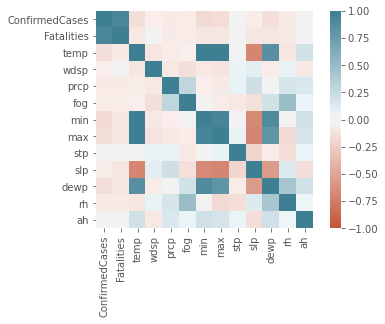

In [190]:
corr = pfc.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True)

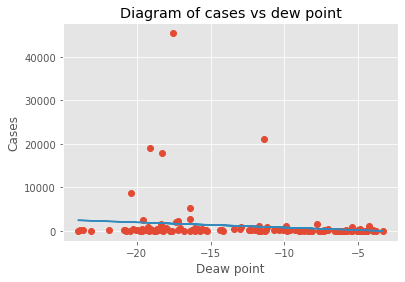

In [191]:
#With the outliers
xi = pfc.dewp
y = pfc.ConfirmedCases

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("Deaw point")
plt.ylabel("Cases")
plt.title('Diagram of cases vs dew point')
ax = plt.gca()
fig = plt.gcf()


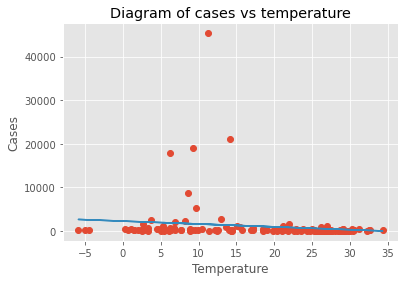

In [192]:
xi = pfc.temp
y = pfc.ConfirmedCases

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("Temperature")
plt.ylabel("Cases")
plt.title('Diagram of cases vs temperature')
ax = plt.gca()
fig = plt.gcf()

In [154]:
#Thind dataset i found with extra information about the conditions of patients

In [193]:
#Datasets regarding Greece
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\data\3\Greece.csv")
df = data.copy()

In [194]:
df.head()

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,...,Available Beds/1000,Confirmed Cases/1000,Lung Patients (F),Lung Patients (M),Life Expectancy (M),Life Expectancy (F),Total_tests_conducted,Out_Travels (mill.),In_travels(mill.),Domestic_Travels (mill.)
0,22-01-2020,NaN,Greece,0,0,0,0,39.0742,21.8243,4.17,...,1.075,0.0,18.3,23.49,78.2,83.6,15961,NaN,"30,123","26,301"
1,23-01-2020,NaN,Greece,0,0,0,0,39.0742,21.8243,4.89,...,1.075,0.0,18.3,23.49,78.2,83.6,15961,NaN,"30,123","26,301"
2,24-01-2020,NaN,Greece,0,0,0,0,39.0742,21.8243,4.22,...,1.075,0.0,18.3,23.49,78.2,83.6,15961,NaN,"30,123","26,301"
3,25-01-2020,NaN,Greece,0,0,0,0,39.0742,21.8243,5.33,...,1.075,0.0,18.3,23.49,78.2,83.6,15961,NaN,"30,123","26,301"
4,26-01-2020,NaN,Greece,0,0,0,0,39.0742,21.8243,8.06,...,1.075,0.0,18.3,23.49,78.2,83.6,15961,NaN,"30,123","26,301"


In [202]:
df['Date']=pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='ignore')
print(df['Date'])

0    2020-01-22
1    2020-01-23
2    2020-01-24
3    2020-01-25
4    2020-01-26
        ...    
64   2020-03-26
65   2020-03-27
66   2020-03-28
67   2020-03-29
68   2020-03-30
Name: Date, Length: 69, dtype: datetime64[ns]


In [203]:
#Remove the dates where the cases are zero
pf=df[df.Cumulative_cases != 0]

In [204]:
pf.head()

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,...,Available Beds/1000,Confirmed Cases/1000,Lung Patients (F),Lung Patients (M),Life Expectancy (M),Life Expectancy (F),Total_tests_conducted,Out_Travels (mill.),In_travels(mill.),Domestic_Travels (mill.)
35,2020-02-26,NaN,Greece,1,0,1,0,39.0742,21.8243,11.11,...,1.075,0.000096,18.3,23.49,78.2,83.6,15961,NaN,"30,123","26,301"
36,2020-02-27,NaN,Greece,3,0,2,0,39.0742,21.8243,14.06,...,1.075,0.000288,18.3,23.49,78.2,83.6,15961,NaN,"30,123","26,301"
37,2020-02-28,NaN,Greece,4,0,1,0,39.0742,21.8243,11.72,...,1.075,0.000384,18.3,23.49,78.2,83.6,15961,NaN,"30,123","26,301"
38,2020-02-29,NaN,Greece,4,0,0,0,39.0742,21.8243,9.83,...,1.075,0.000384,18.3,23.49,78.2,83.6,15961,NaN,"30,123","26,301"
39,2020-03-01,NaN,Greece,7,0,3,0,39.0742,21.8243,7.83,...,1.075,0.000672,18.3,23.49,78.2,83.6,15961,NaN,"30,123","26,301"


In [205]:
pf.set_index('Date',inplace=True) #set date as the index

In [206]:
pf3= pf['03-15-2020':'03-30-2020']

In [207]:
pf3.head()

,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Min_temperature,...,Available Beds/1000,Confirmed Cases/1000,Lung Patients (F),Lung Patients (M),Life Expectancy (M),Life Expectancy (F),Total_tests_conducted,Out_Travels (mill.),In_travels(mill.),Domestic_Travels (mill.)
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-15,NaN,Greece,331,4,103,1,39.0742,21.8243,10.94,7.28,...,1.075,0.031757,18.3,23.49,78.2,83.6,15961,NaN,"30,123","26,301"
2020-03-16,NaN,Greece,331,4,0,0,39.0742,21.8243,7.44,2.39,...,1.075,0.031757,18.3,23.49,78.2,83.6,15961,NaN,"30,123","26,301"
2020-03-17,NaN,Greece,387,5,56,1,39.0742,21.8243,7.33,0.11,...,1.075,0.037129,18.3,23.49,78.2,83.6,15961,NaN,"30,123","26,301"
2020-03-18,NaN,Greece,418,5,31,0,39.0742,21.8243,9.00,-0.50,...,1.075,0.040103,18.3,23.49,78.2,83.6,15961,NaN,"30,123","26,301"
2020-03-19,NaN,Greece,418,6,0,1,39.0742,21.8243,10.11,2.78,...,1.075,0.040103,18.3,23.49,78.2,83.6,15961,NaN,"30,123","26,301"


In [215]:
df2 = pf3.drop(['State','Daily_cases','Daily_death','Latitude','Longitude','Out_Travels (mill.)','Population','Population Density/km','Median_Age','Life Expectancy (F)','Total_tests_conducted'], axis=1)

In [216]:
df2.head()

,Country,Cumulative_cases,Cumulative_death,Temperature,Min_temperature,Max_temperature,Wind_speed,Precipitation,Fog_Presence,Sex_Ratio,Age%_65+,Hospital Beds/1000,Available Beds/1000,Confirmed Cases/1000,Lung Patients (F),Lung Patients (M),Life Expectancy (M),In_travels(mill.),Domestic_Travels (mill.)
Date,,,,,,,,,,,,,,,,,,,
2020-03-15,Greece,331,4,10.94,7.28,16.11,6.1,99.99,1,0.95,21.14,4.3,1.075,0.031757,18.3,23.49,78.2,"30,123","26,301"
2020-03-16,Greece,331,4,7.44,2.39,12.39,4.1,0.00,1,0.95,21.14,4.3,1.075,0.031757,18.3,23.49,78.2,"30,123","26,301"
2020-03-17,Greece,387,5,7.33,0.11,18.00,4.8,0.00,0,0.95,21.14,4.3,1.075,0.037129,18.3,23.49,78.2,"30,123","26,301"
2020-03-18,Greece,418,5,9.00,-0.50,19.28,4.2,5.75,0,0.95,21.14,4.3,1.075,0.040103,18.3,23.49,78.2,"30,123","26,301"
2020-03-19,Greece,418,6,10.11,2.78,19.00,5.5,0.00,0,0.95,21.14,4.3,1.075,0.040103,18.3,23.49,78.2,"30,123","26,301"


In [217]:
df2.corr()

,Cumulative_cases,Cumulative_death,Temperature,Min_temperature,Max_temperature,Wind_speed,Precipitation,Fog_Presence,Sex_Ratio,Age%_65+,Hospital Beds/1000,Available Beds/1000,Confirmed Cases/1000,Lung Patients (F),Lung Patients (M),Life Expectancy (M)
Cumulative_cases,1.000000,0.992061,2.566267e-01,3.742335e-01,-1.361742e-01,-9.066602e-02,-3.386572e-01,0.055427,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Cumulative_death,0.992061,1.000000,2.684866e-01,3.765894e-01,-1.219124e-01,-7.991769e-02,-3.024302e-01,0.057126,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.920606e-01,0.000000e+00,0.000000e+00,0.000000e+00
Temperature,0.256627,0.268487,1.000000e+00,3.287676e-01,5.278822e-01,-7.863961e-02,7.418211e-02,-0.366928,1.378472e-15,1.378472e-15,1.378472e-15,1.378472e-15,2.566267e-01,-1.378472e-15,-1.378472e-15,-1.378472e-15
Min_temperature,0.374234,0.376589,3.287676e-01,1.000000e+00,-5.945799e-01,2.773693e-01,1.662530e-01,0.235790,-8.802577e-18,-8.802577e-18,-8.802577e-18,-8.802577e-18,3.742335e-01,8.802577e-18,8.802577e-18,8.802577e-18
Max_temperature,-0.136174,-0.121912,5.278822e-01,-5.945799e-01,1.000000e+00,-2.291274e-01,-5.264896e-02,-0.576108,9.266836e-16,9.266836e-16,9.266836e-16,9.266836e-16,-1.361742e-01,-9.266836e-16,-9.266836e-16,-9.266836e-16
Wind_speed,-0.090666,-0.079918,-7.863961e-02,2.773693e-01,-2.291274e-01,1.000000e+00,2.576854e-01,-0.248636,-3.526240e-16,-3.526240e-16,-3.526240e-16,-3.526240e-16,-9.066602e-02,3.526240e-16,3.526240e-16,3.526240e-16
Precipitation,-0.338657,-0.302430,7.418211e-02,1.662530e-01,-5.264896e-02,2.576854e-01,1.000000e+00,0.373776,-3.217918e-17,-3.217918e-17,-3.217918e-17,-3.217918e-17,-3.386572e-01,3.217918e-17,3.217918e-17,3.217918e-17
Fog_Presence,0.055427,0.057126,-3.669279e-01,2.357900e-01,-5.761079e-01,-2.486360e-01,3.737762e-01,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.542735e-02,0.000000e+00,0.000000e+00,0.000000e+00
Sex_Ratio,0.000000,0.000000,1.378472e-15,-8.802577e-18,9.266836e-16,-3.526240e-16,-3.217918e-17,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.254418e-16,-1.000000e+00,-1.000000e+00,-1.000000e+00
Age%_65+,0.000000,0.000000,1.378472e-15,-8.802577e-18,9.266836e-16,-3.526240e-16,-3.217918e-17,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.254418e-16,-1.000000e+00,-1.000000e+00,-1.000000e+00


In [219]:
pfc = df2.drop('Country', axis=1)

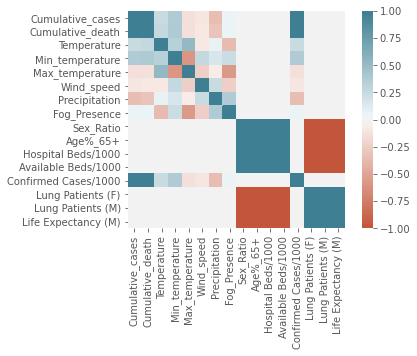

In [220]:
corr = pfc.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True)

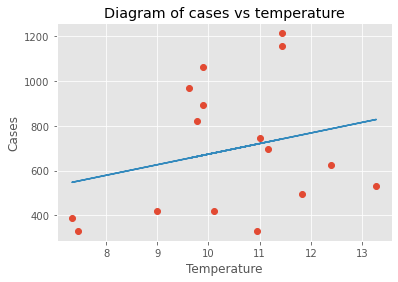

In [221]:
xi = pfc.Temperature
y = pfc.Cumulative_cases

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("Temperature")
plt.ylabel("Cases")
plt.title('Diagram of cases vs temperature')
ax = plt.gca()
fig = plt.gcf()